In [104]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

### Clickbait dataset

In [2]:
df = pd.read_csv("clickbait_data.csv")

In [46]:
# df[df['headline'].str.contains("^\d")] #numbers

#### take N random 0 and 1 to pass to GPT

In [52]:
N = 20

In [54]:
non_clkb = df[df["clickbait"] == 0].sample(N)
non_clkb

,headline,clickbait
25070,"Gap Posted a Profit, but Sales Declined 8% in ...",0
22444,Permanent Flood Solutions Just Out of Reach fo...,0
21772,Violence in Somalia's capital kills 22 people,0
29419,Obama Voices Optimism on the Economy,0
25378,Republicans seek to reduce ethics rules,0
18069,New Zealand Government announces record surplus,0
20528,Russian Rider Grabs Giro Lead in Treacherous T...,0
19783,"For Wall Street, a Barrage of Mixed Messages",0
24303,Google announces new database service on blog,0
26271,Audio tape released of missing Israeli soldier,0


In [60]:
clkb = df[df["clickbait"] == 1].sample(N)
clkb

,headline,clickbait
9051,We Know What Your Love Life Will Look Like In ...,1
1629,Kylie Jenner Blow-Drying Her Crotch In A CVS B...,1
10096,Tell Us About Yourself(ie): Eric Balfour,1
14055,Which Bollywood Era Do You Belong To,1
5954,We Made Thanksgiving Dinner In A Slow Cooker A...,1
12650,Black Friday Shopper Camps Out For Entire Week...,1
9002,Which 2016 World Tour Should You See Based On ...,1
13983,"25 Important Lessons We Learned From ""The O.C.""",1
3714,Intensely Running Ryan Phillippe Is All Of Us,1
3493,Which Disney Song Are You Based On Your Zodiac...,1


We Know What Your Love Life Will Look Like In 2016
Kylie Jenner Blow-Drying Her Crotch In A CVS Bathroom Is More Funny Than It Should Be
Tell Us About Yourself(ie): Eric Balfour
Which Bollywood Era Do You Belong To
We Made Thanksgiving Dinner In A Slow Cooker And It Actually Worked
Black Friday Shopper Camps Out For Entire Week, Is Not Fucking Around
Which 2016 World Tour Should You See Based On Your Birth Month
25 Important Lessons We Learned From "The O.C."
Intensely Running Ryan Phillippe Is All Of Us
Which Disney Song Are You Based On Your Zodiac Sign
We Know Your Go-To Monopoly Piece Based On Your Zodiac Sign
Which Dinosaur Matches Your Zodiac Sign
What Would Your "Star Wars" Porn Name Be
Oprah Winfrey Had The Best Possible Response When Asked About T.I.'s Recent Comments
17 Tumblr Posts About Teachers Guaranteed To Make You Laugh
In The Event Of My Untimely Disappearance
Which Marijuana Strain Should You Smoke Based On Your Zodiac Sign
Signs You Grew Up In Southern California
We 

In [64]:
print("\n".join(non_clkb["headline"]))

Gap Posted a Profit, but Sales Declined 8% in Quarter
Permanent Flood Solutions Just Out of Reach for Fargo
Violence in Somalia's capital kills 22 people
Obama Voices Optimism on the Economy
Republicans seek to reduce ethics rules
New Zealand Government announces record surplus
Russian Rider Grabs Giro Lead in Treacherous Time Trial
For Wall Street, a Barrage of Mixed Messages
Google announces new database service on blog
Audio tape released of missing Israeli soldier
As the Eurovision entrants return home, the home crowds weigh in
Two Newcastle football players fight each other, both sent off
Canon Inc. to buy the stake of Toshiba in their joint venture
All 2500 runners in Lake District race accounted for after flood
Olympic condoms auctioned: "faster, higher, stronger"
Magnitude 6.3 earthquake hits New Zealand's South Island; dozens dead
29 killed in Algerian floods
Medicare System Overhaul Proposed by Two Senators
Southampton City Council votes against water fluoridation
In Europe, 

### Clickbait testset from file:
https://docs.google.com/spreadsheets/d/17-hda5J_Z-AuRwSiLevnfG1x1zwXIk0BFCA_d1v_zOI/edit?gid=0#gid=0

In [30]:
bl = pd.read_csv("clickbait_baseline.csv")
true_labels = bl["labels"]

In [89]:
accuracy_score(bl["gpt4o"], true_labels)

0.83

## Attempts

### First attempt

In [91]:
first_attempt = pd.read_csv("first_attempt.csv", sep=";")
wrong_answers_fst = list(first_attempt[true_labels != first_attempt["classification"]]["headline"])
len(wrong_answers_fst), accuracy_score(first_attempt["classification"], true_labels)

(10, 0.9)

In [92]:
print("\n".join(wrong_answers_fst))

Chris Moyles Is Returning To Radio With A Breakfast Show On Radio X
How Do You Stay Fit In College
Tell Us Why You Take Medication For Your Mental Health
This Web Series Is Helping Trans Teens Find Their Personal Definition Of Beauty
41,000 Indians Have Petitioned The Censor Board For More Gender-Sensitive Ratings
David Bowie\'s Musical 'Lazarus' Showcases His Enduring Legacy
Did You Prefer The Broadway Show Or The Movie
18 Differences Between Snow Days In Canada And America
17 'Twilight Zone' Episodes To Watch If You\'ve Never Seen 'The Twilight Zone'
Can You And Your Family Finish This Freestyle Crossword


In [93]:
first_attempt[true_labels != first_attempt["classification"]]

,headline,classification
0,Chris Moyles Is Returning To Radio With A Brea...,0
8,How Do You Stay Fit In College,0
9,Tell Us Why You Take Medication For Your Menta...,0
10,This Web Series Is Helping Trans Teens Find Th...,0
33,"41,000 Indians Have Petitioned The Censor Boar...",0
34,David Bowie\'s Musical 'Lazarus' Showcases His...,0
37,Did You Prefer The Broadway Show Or The Movie,0
38,18 Differences Between Snow Days In Canada And...,0
40,17 'Twilight Zone' Episodes To Watch If You\'v...,0
48,Can You And Your Family Finish This Freestyle ...,0


### Second attempt

In [100]:
second_attempt = pd.read_csv("second_attempt.csv", sep=";")
wrong_answers_snd = list(second_attempt[true_labels != second_attempt["classification"]]["headline"])
len(wrong_answers_snd), accuracy_score(second_attempt["classification"], true_labels), f1_score(second_attempt["classification"], true_labels)

(11, 0.89, 0.8764044943820225)

In [95]:
second_attempt[true_labels != second_attempt["classification"]]

,headline,classification
0,Chris Moyles Is Returning To Radio With A Brea...,0
2,23 Made In America Clothing Brands You Should ...,0
8,How Do You Stay Fit In College,0
9,Tell Us Why You Take Medication For Your Menta...,0
10,This Web Series Is Helping Trans Teens Find Th...,0
33,"41,000 Indians Have Petitioned The Censor Boar...",0
34,David Bowie\'s Musical 'Lazarus' Showcases His...,0
37,Did You Prefer The Broadway Show Or The Movie,0
38,18 Differences Between Snow Days In Canada And...,0
40,17 'Twilight Zone' Episodes To Watch If You\'v...,0


In [80]:
print("\n".join(wrong_answers_snd))

Chris Moyles Is Returning To Radio With A Breakfast Show On Radio X
23 Made In America Clothing Brands You Should Know
How Do You Stay Fit In College
Tell Us Why You Take Medication For Your Mental Health
This Web Series Is Helping Trans Teens Find Their Personal Definition Of Beauty
41,000 Indians Have Petitioned The Censor Board For More Gender-Sensitive Ratings
David Bowie\'s Musical 'Lazarus' Showcases His Enduring Legacy
Did You Prefer The Broadway Show Or The Movie
18 Differences Between Snow Days In Canada And America
17 'Twilight Zone' Episodes To Watch If You\'ve Never Seen 'The Twilight Zone'
Can You And Your Family Finish This Freestyle Crossword


### Third attempt

In [102]:
third_attempt = pd.read_csv("third_attempt.csv", sep=";")
wrong_answers_thd = list(third_attempt[true_labels != third_attempt["classification"]]["headline"])
len(wrong_answers_thd), accuracy_score(third_attempt["classification"], true_labels), f1_score(third_attempt["classification"], true_labels)

(8, 0.92, 0.9166666666666666)

In [82]:
print("\n".join(wrong_answers_thd))

23 Made In America Clothing Brands You Should Know
How Do You Stay Fit In College
41,000 Indians Have Petitioned The Censor Board For More Gender-Sensitive Ratings
David Bowie\'s Musical 'Lazarus' Showcases His Enduring Legacy
18 Differences Between Snow Days In Canada And America
17 'Twilight Zone' Episodes To Watch If You\'ve Never Seen 'The Twilight Zone'
A Madoff Cookbook Has a Secret, Too
Bigfoot' hunters claim to have found corpse of mythical creature in Georgia, USA


### Fourth attempt

In [101]:
fourth_attempt = pd.read_csv("fourth_attempt.csv", sep=";")
wrong_answers_frh = list(fourth_attempt[true_labels != fourth_attempt["classification"]]["headline"])
len(wrong_answers_frh), accuracy_score(fourth_attempt["classification"], true_labels), f1_score(fourth_attempt["classification"], true_labels)

(2, 0.98, 0.9803921568627451)

In [99]:
print("\n".join(wrong_answers_frh))

A Madoff Cookbook Has a Secret, Too
Bigfoot' hunters claim to have found corpse of mythical creature in Georgia, USA


## Visualisation

In [119]:
def plot_cm(y_true, y_predicted):
    cm = confusion_matrix(y_true, y_predicted)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

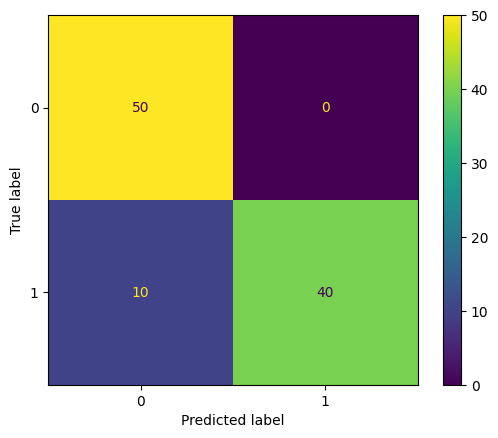

In [120]:
plot_cm(true_labels, first_attempt["classification"])

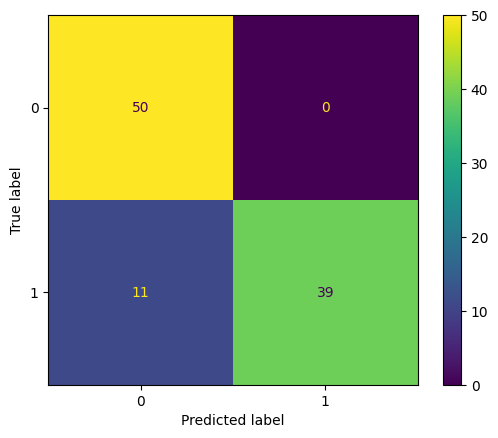

In [121]:
plot_cm(true_labels, second_attempt["classification"])

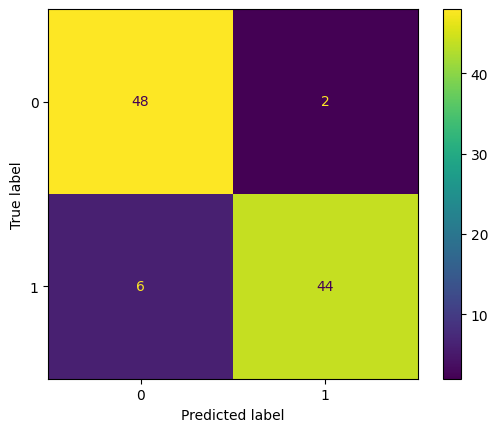

In [122]:
plot_cm(true_labels, third_attempt["classification"])

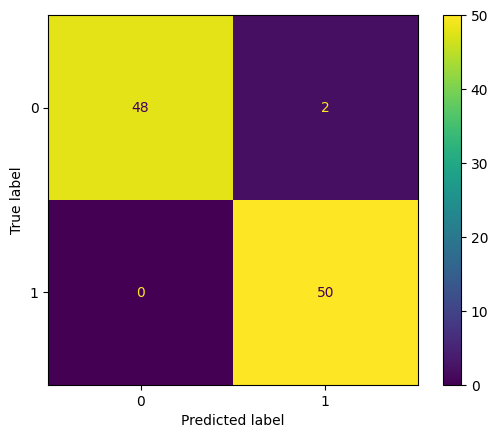

In [127]:
plot_cm(true_labels, fourth_attempt["classification"])

### Chat history

In [98]:
"""
This is a clickbait data. Please classify it as 0 for non-clickbait and 1 for clickbait, respectively. Do not need generate code, just classify directly. Create it in CSV format with semicolon as delimiter. The results only are needed, no explanations required
<testset>
===========================================================================================================================



let's clarify some common features for clickbait (1) to make prediction more accurate:
- The headline promises amazing results, crazy secrets or shocking information.
- The title plays on the reader's emotions: fears, curiosity, admiration or another.
- Exclamations in the headlines
- The urge to action
- Promise to disclose some secret information

And now for the non-clickbait (0) common features are:
- Clear headline without secrets, containing brief information that will be in the text
- Non-clickbait have no calls to action, it does not cause emotions just focusing on information and facts

There are some examples below provided:
Clickbait headlines (1):
We Know What Your Love Life Will Look Like In 2016
Kylie Jenner Blow-Drying Her Crotch In A CVS Bathroom Is More Funny Than It Should Be
Tell Us About Yourself(ie): Eric Balfour
Which Bollywood Era Do You Belong To
We Made Thanksgiving Dinner In A Slow Cooker And It Actually Worked
Black Friday Shopper Camps Out For Entire Week, Is Not Fucking Around
Which 2016 World Tour Should You See Based On Your Birth Month
25 Important Lessons We Learned From "The O.C."
Intensely Running Ryan Phillippe Is All Of Us
Which Disney Song Are You Based On Your Zodiac Sign
We Know Your Go-To Monopoly Piece Based On Your Zodiac Sign
Which Dinosaur Matches Your Zodiac Sign
What Would Your "Star Wars" Porn Name Be
Oprah Winfrey Had The Best Possible Response When Asked About T.I.'s Recent Comments
17 Tumblr Posts About Teachers Guaranteed To Make You Laugh
In The Event Of My Untimely Disappearance
Which Marijuana Strain Should You Smoke Based On Your Zodiac Sign
Signs You Grew Up In Southern California
We Can Guess What Your Dog's Name Is In A Single Try
The First Trailer For Netflix's "The Get Down" Is Here And It's Incredible


Non-clickbait headlines(0):
Gap Posted a Profit, but Sales Declined 8% in Quarter
Permanent Flood Solutions Just Out of Reach for Fargo
Violence in Somalia's capital kills 22 people
Obama Voices Optimism on the Economy
Republicans seek to reduce ethics rules
New Zealand Government announces record surplus
Russian Rider Grabs Giro Lead in Treacherous Time Trial
For Wall Street, a Barrage of Mixed Messages
Google announces new database service on blog
Audio tape released of missing Israeli soldier
As the Eurovision entrants return home, the home crowds weigh in
Two Newcastle football players fight each other, both sent off
Canon Inc. to buy the stake of Toshiba in their joint venture
All 2500 runners in Lake District race accounted for after flood
Olympic condoms auctioned: "faster, higher, stronger"
Magnitude 6.3 earthquake hits New Zealand's South Island; dozens dead
29 killed in Algerian floods
Medicare System Overhaul Proposed by Two Senators
Southampton City Council votes against water fluoridation
In Europe, Possible Survival Lessons for U.S. Papers

Now, make predictions one more time. Do not need generate code, just classify directly. Create it in CSV format with semicolon as delimiter. The results only are needed, no explanations required
<testset>
===========================================================================================================================


Chris Moyles Is Returning To Radio With A Breakfast Show On Radio X
23 Made In America Clothing Brands You Should Know
How Do You Stay Fit In College
Tell Us Why You Take Medication For Your Mental Health
This Web Series Is Helping Trans Teens Find Their Personal Definition Of Beauty
41,000 Indians Have Petitioned The Censor Board For More Gender-Sensitive Ratings
David Bowie\'s Musical 'Lazarus' Showcases His Enduring Legacy
Did You Prefer The Broadway Show Or The Movie
18 Differences Between Snow Days In Canada And America
17 'Twilight Zone' Episodes To Watch If You\'ve Never Seen 'The Twilight Zone'
Can You And Your Family Finish This Freestyle Crossword

these are clickbait text which are difficult to figure out. Can you tell me what is the common features of them?
===========================================================================================================================


Let's make the prompt to improve classification for Interest and Curiosity Generation also using the provided before with some common features.



===========================================================================================================================


Please classify the following headlines as 0 for non-clickbait and 1 for clickbait, respectively. Use a CSV format with semicolon as the delimiter. Focus on the common features provided for both clickbait and non-clickbait headlines, especially those that generate interest and curiosity.

Clickbait (1) Common Features:
The headline promises amazing results, crazy secrets, or shocking information.
The title plays on the reader's emotions: fears, curiosity, admiration, or another.
Exclamations in the headlines.
The urge to action.
Promise to disclose some secret information.
Headlines crafted to spark curiosity and interest in a specific topic.
Target a specific audience or group, making the content feel personalized and relevant.
Emotional language or implications used to draw in readers.
Use of questions to engage readers and make them think.
Highlighting cultural, social, or current topics.
Casual or conversational tone to make headlines feel more approachable and engaging.
Non-clickbait (0) Common Features:
Clear headline without secrets, containing brief information that will be in the text.
Non-clickbait has no calls to action, it does not cause emotions, just focusing on information and facts.
Objective and factual, focusing on delivering straightforward information.
No use of questions or exclamations.
Neutral tone, avoiding overly emotional or sensational language.

<testset>

===========================================================================================================================
#3


23 Made In America Clothing Brands You Should Know
How Do You Stay Fit In College
41,000 Indians Have Petitioned The Censor Board For More Gender-Sensitive Ratings
David Bowie\'s Musical 'Lazarus' Showcases His Enduring Legacy
18 Differences Between Snow Days In Canada And America
17 'Twilight Zone' Episodes To Watch If You\'ve Never Seen 'The Twilight Zone'
A Madoff Cookbook Has a Secret, Too
Bigfoot' hunters claim to have found corpse of mythical creature in Georgia, USA

these are clickbait text which are difficult to figure out. Can you tell me what is the common features of them?
===========================================================================================================================

relying on the context, Let's make the prompt to improve classification for Lists and Specific Information to improve your last prediction.
===========================================================================================================================



Classify the following headlines as 0 for non-clickbait and 1 for clickbait based on the features outlined above. Use a CSV format with semicolons as delimiters.

Enhanced Prompt for Clickbait and Non-Clickbait Classification
Common Features for Clickbait (1):

Lists and Specific Information: Headlines that include lists or numbers (e.g., "10 Best...", "5 Reasons...", "23 Things...") often promise comprehensive and easy-to-digest content, generating curiosity and interest.
Promises Amazing Results or Secrets: Headlines that suggest revealing secrets, amazing results, or shocking information.
Emotional Engagement: Titles that play on the reader's emotions such as fear, curiosity, admiration, etc.
Calls to Action: Phrases encouraging immediate action or engagement (e.g., "Find out now", "You won't believe...").
Questions: Use of questions to pique curiosity (e.g., "Can You Guess...?", "How Do You...?")
Highlighting Social, Cultural, or Current Topics: Headlines that engage with current events or social issues, promising detailed insights.
Casual or Conversational Tone: Making headlines feel approachable and engaging.
Common Features for Non-Clickbait (0):

Clear and Informative: Headlines that provide clear, brief information on the content without hidden details.
Factual and Objective: Focuses on delivering straightforward information, avoiding emotional or sensational language.
Neutral Tone: No use of questions, exclamations, or emotional engagement.


===========================================================================================================================

===========================================================================================================================

"""


'\nThis is a clickbait data. Please classify it as 0 for non-clickbait and 1 for clickbait, respectively. Do not need generate code, just classify directly. Create it in CSV format with semicolon as delimiter. The results only are needed, no explanations required\n<testset>\n===========================================================================================================================\n\n\n\nlet\'s clarify some common features for clickbait (1) to make prediction more accurate:\n- The headline promises amazing results, crazy secrets or shocking information.\n- The title plays on the reader\'s emotions: fears, curiosity, admiration or another.\n- Exclamations in the headlines\n- The urge to action\n- Promise to disclose some secret information\n\nAnd now for the non-clickbait (0) common features are:\n- Clear headline without secrets, containing brief information that will be in the text\n- Non-clickbait have no calls to action, it does not cause emotions just focusing on in